In [1]:
# 加载画图包
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
%load_ext autoreload
%autoreload 1

In [4]:
import sys
sys.path.append('/public/home/mowp/workspace/mowp_scripts/tools/metaplot')
%aimport metaplot

In [5]:
sys.path.append('/public/home/mowp/workspace/mowp_scripts/tools/analysis')
%aimport plot

In [6]:
pal = plot.color_pal('set2')
sns.set_palette(pal)

In [7]:
import pyranges as pr
gff = '/data/Zhaijx/mowp/db/Arabidopsis_thaliana/gff3/Araport11_GFF3_genes_transposons.201606.gff'
gff = pr.read_gff3(gff, as_df=True)

In [16]:
import numpy as np

# BAM file

## scale_region

In [41]:
gene_region = gff.query('Feature == "gene" and End - Start > 1000')[['Chromosome', 'Start', 'End', 'Strand', 'ID']]
gene_region = gene_region.to_numpy()

In [42]:
bins = 1
a = 1000
b = 1000
m = 1000

infile = '/public/home/mowp/data/nanopore_data/20220114_paf1_hub1_clfswn_col/20220114_col0_bc8/elongating_data/20220114_col0_bc8.elongating.bam'
cov = metaplot.bam_scale_region(infile, gene_region, bins=bins, before=b, after=a, regionbody=m, exclude_chr={'Pt', 'Mt'})

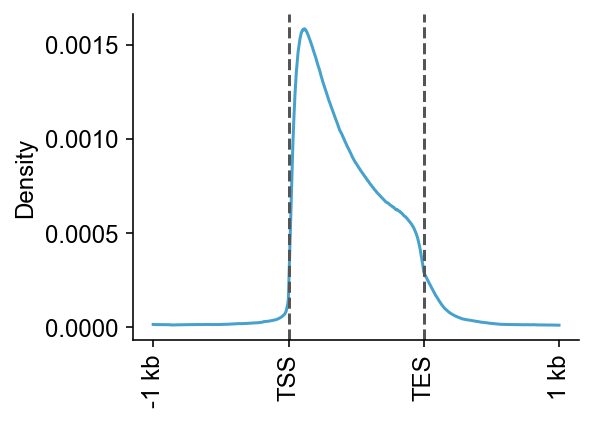

In [43]:
plt.figure(figsize=(4, 3))
plt.plot(cov)

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'TSS', 'TES', f'{a//1000} kb'], rotation=90)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('Density')
# plt.legend(frameon=False, bbox_to_anchor=(1, 0, .5, 1))
sns.despine(top=True, right=True)

<div class="alert alert-info">

**split mode**

in this mode, the region between site1 and site2 are splited instead of scale

<div>

In [36]:
bins = 1
a = 1000
b = 1000
m = 1000

infile = '/public/home/mowp/data/nanopore_data/20220114_paf1_hub1_clfswn_col/20220114_col0_bc8/elongating_data/20220114_col0_bc8.elongating.bam'
cov_5, cov_3 = metaplot.bam_scale_region(infile, gene_region, bins=bins, split=True, before=b, after=a, regionbody=m, exclude_chr={'Pt', 'Mt'})

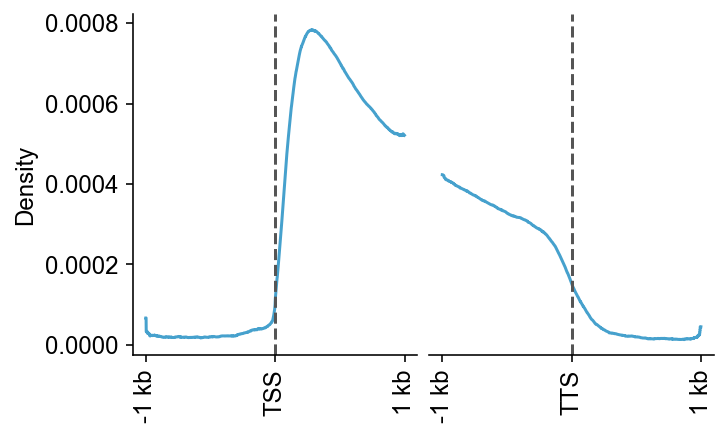

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
ax[0].plot(cov_5)
ax[1].plot(cov_3)

metaplot.set_ax(ax, bins, b, a, b, a, site1='TSS', site2='TTS', ylabel='Density')
plt.tight_layout(pad=.5)

## reference_point

In [14]:
gene_region = gff.query('Feature == "gene" and End - Start > 1000')[['Chromosome', 'Start', 'End', 'Strand', 'ID']]

In [17]:
tss_region = gene_region.apply(
    lambda x: (x.Chromosome, x.Start, x.Strand, x.ID)
    if x.Strand == '+' else
    (x.Chromosome, x.End, x.Strand, x.ID),
    axis=1)
tss_region = np.array(list(tss_region))

In [18]:
tts_region = gene_region.apply(
    lambda x: (x.Chromosome, x.End, x.Strand, x.ID)
    if x.Strand == '+' else
    (x.Chromosome, x.Start, x.Strand, x.ID),
    axis=1)
tts_region = np.array(list(tts_region))

In [19]:
infile = '/public/home/mowp/data/nanopore_data/20220114_paf1_hub1_clfswn_col/20220114_col0_bc8/elongating_data/20220114_col0_bc8.elongating.bam'
bins = 1
b1 = 2000
a1 = 2000
tss_cov = metaplot.bam_reference_point(infile, tss_region, bins=bins, before=b1, after=a1, exclude_chr={'Pt', 'Mt'})
tts_cov = metaplot.bam_reference_point(infile, tts_region, bins=bins, before=b1, after=a1, exclude_chr={'Pt', 'Mt'})

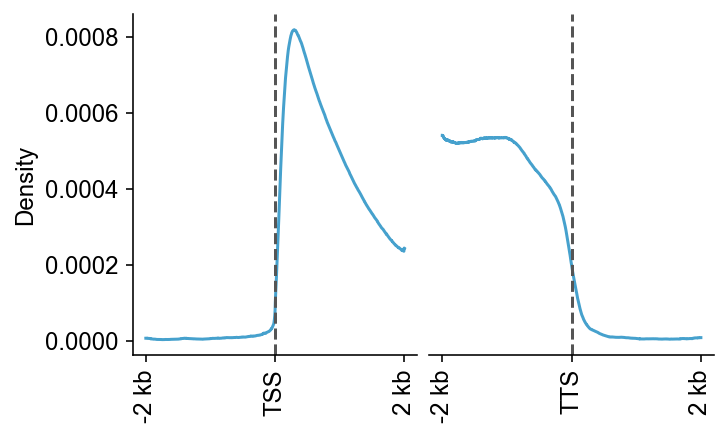

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
ax[0].plot(tss_cov)
ax[1].plot(tts_cov)

metaplot.set_ax(ax, bins, b1, a1, b1, a1, site1='TSS', site2='TTS', ylabel='Density')
plt.tight_layout(pad=.5)

# bigWig file

## scale_region

In [22]:
gene_region = gff.query('Feature == "gene" and End - Start > 1000')[['Chromosome', 'Start', 'End', 'Strand']]
gene_region = gene_region.to_numpy()

In [23]:
bins = 10
b = 1000
a = 1000
m = 1000

infile = '/data/Zhaijx/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K4me3_ChIPseq_GSM4275144.sorted.rmdup.CPM.bw'

cov = metaplot.bw_scale_regions(
    infile,
    gene_region,
    before=b,
    after=a,
    regionbody=m,
    bins=bins,
    exclude_chr={'Pt', 'Mt'}
)

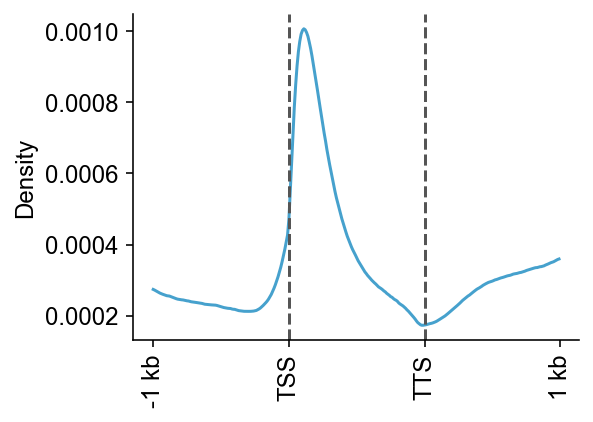

In [24]:
plt.figure(figsize=(4, 3))
plt.plot(cov)

plt.xticks([0, b//bins, (b+m)//bins, (a+b+m)//bins], [f'-{b//1000} kb', 'TSS', 'TTS', f'{a//1000} kb'], rotation=90)
plt.axvline(b//bins, ls='--', color='#555555')
plt.axvline((b+m)//bins, ls='--', color='#555555')

plt.ylabel('Density')
# plt.legend(frameon=False, bbox_to_anchor=(1, 0, .5, 1))
sns.despine(top=True, right=True)

<div class="alert alert-info">

**split mode**

in this mode, the region between site1 and site2 are splited instead of scale

<div>

In [25]:
bins = 10
b = 1000
a = 1000
m = 1000

infile = '/data/Zhaijx/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K4me3_ChIPseq_GSM4275144.sorted.rmdup.CPM.bw'

cov_5, cov_3 = metaplot.bw_scale_regions(
    infile,
    gene_region,
    before=b,
    after=a,
    regionbody=m,
    bins=bins,
    split=True,
    exclude_chr={'Pt', 'Mt'}
)

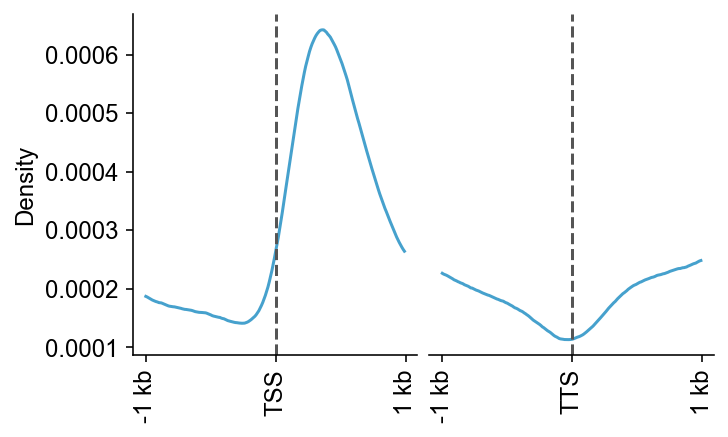

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(5, 3), sharey=True)
ax[0].plot(cov_5)
ax[1].plot(cov_3)

metaplot.set_ax(ax, bins, b, a, b, a, site1='TSS', site2='TTS', ylabel='Density')
plt.tight_layout(pad=.5)

## reference_point

In [28]:
gene_region = gff.query('Feature == "gene" and End - Start > 1000')[['Chromosome', 'Start', 'End', 'Strand']]

In [29]:
tss_region = gene_region.apply(
    lambda x: (x.Chromosome, x.Start, x.Strand)
    if x.Strand == '+' else
    (x.Chromosome, x.End, x.Strand),
    axis=1)
tss_region = np.array(list(tss_region))

In [30]:
tts_region = gene_region.apply(
    lambda x: (x.Chromosome, x.End, x.Strand)
    if x.Strand == '+' else
    (x.Chromosome, x.Start, x.Strand),
    axis=1)
tts_region = np.array(list(tts_region))

In [31]:
infile = '/data/Zhaijx/mowp/data/public_data/epigentics_data/MED_GSE143831/bw_files/col_H3K4me3_ChIPseq_GSM4275144.sorted.rmdup.CPM.bw'
bins = 20
b1 = 1000
a1 = 1000
tss_cov = metaplot.bw_reference_point(infile, tss_region, bins=bins, before=b1, after=a1, exclude_chr={'Pt', 'Mt'})
tts_cov = metaplot.bw_reference_point(infile, tts_region, bins=bins, before=b1, after=a1, exclude_chr={'Pt', 'Mt'})

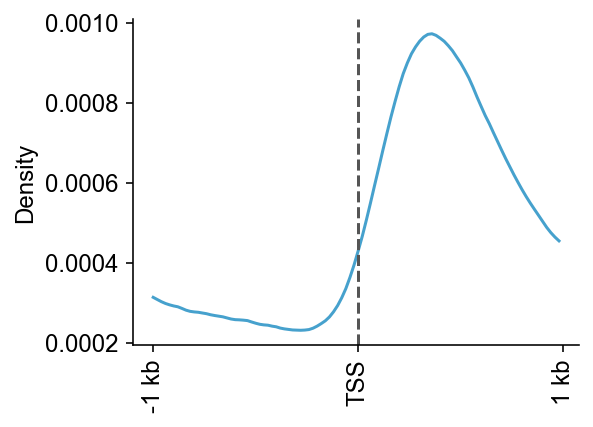

In [32]:
fig, ax = plt.subplots(1, figsize=(4, 3), sharey=True)
ax.plot(tss_cov)

metaplot.set_ax(ax, bins, b1, a1, site1='TSS', site2='TTS', ylabel='Density')

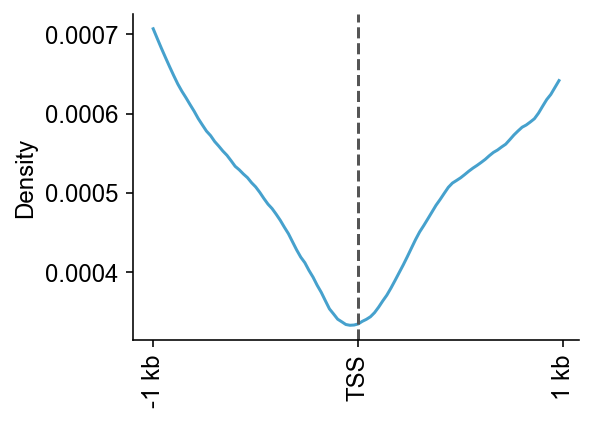

In [33]:
fig, ax = plt.subplots(1, figsize=(4, 3), sharey=True)
ax.plot(tts_cov)

metaplot.set_ax(ax, bins, b1, a1, site1='TSS', site2='TTS', ylabel='Density')